In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Import the dataset
df = pd.read_csv('heart.csv')
### Checking the shape and column names of the dataset
print('Shape of the Dataset:', df.shape)
print('Columns present in the dataset:', df.columns)

Shape of the Dataset: (303, 14)
Columns present in the dataset: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


### Important NOTE - Contrary to normal ML terminology, here :
##### target = 1 ---> No Disease
##### target = 0 ---> Disease

In [3]:
### As reported by @IntiPic, #93, 139, 164, 165 and 252 have ca=4 which is incorrect.In the original dataset, they are NaNs.
### So, lets get rid of the rows with ca=4.
df = df[df.ca != 4]
### Lets check if the ca=4 are removed
print('Unique values in "ca" after removal of ca=4:', df['ca'].unique())

### Similarly, rows with thal = 0 are also incorrect. They are NaNs in the original dataset. So, lets remove them too.
df = df[df.thal != 0]
### Check for unique values in thal
print('Unique values in "thal" after removal of thal=0:',df['thal'].unique())

print('Shape of dataset after removal of NAN vlaues:', df.shape)

Unique values in "ca" after removal of ca=4: [0 2 1 3]
Unique values in "thal" after removal of thal=0: [1 2 3]
Shape of dataset after removal of NAN vlaues: (296, 14)


In [4]:
### Changing the existing Cryptic column names to descriptive type for better understanding of features
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar', 'rest_ecg',
              'max_heart_rate', 'exercise_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [5]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now, lets dive a bit deeper into data and classify the variables into numeric/continuous , ordinal and nominal. This may require a little bit of Domain Knowledge and some insights into data distribution. 


1- **Numeric**--->['age', 'resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate', 'st_depression']

2- **Ordinal**--->['chest_pain_type', 'rest_ecg', 'num_major_vessels', 'st_slope', 'thalassemia']

2- **Nominal**--->['sex', 'fasting_blood_sugar', exercise_angina]

So, lets treat Numeric and ordinal data as continuous variables and Nominal data as categorical variables. So it doesn't make sense to scale a categorical variable.

In [6]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate', 'exercise_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [7]:
### Lets see a subset of the Correlation Matrix - i.e. Correlation of all the features with the target
correlation = df.corr()
pd.DataFrame(correlation['target']).sort_values(by='target',ascending = False).style.background_gradient(cmap = 'viridis')

,target
target,1.000000
max_heart_rate,0.426655
chest_pain_type,0.423425
st_slope,0.337825
rest_ecg,0.131716
fasting_blood_sugar,-0.004680
serum_cholesterol,-0.076541
resting_blood_pressure,-0.148922
age,-0.225453
sex,-0.285322


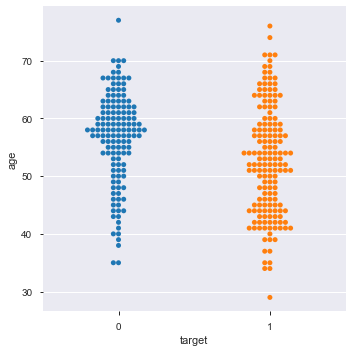

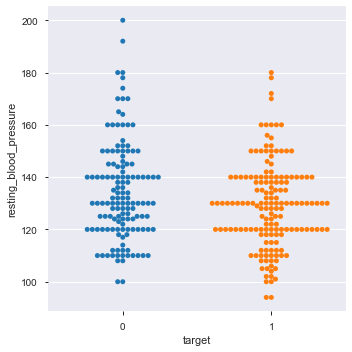

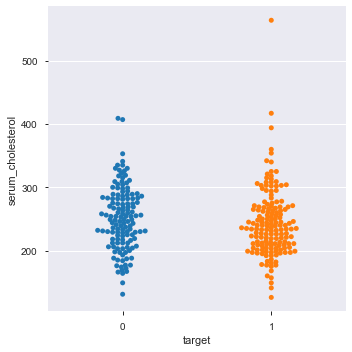

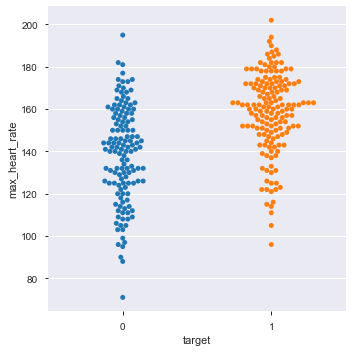

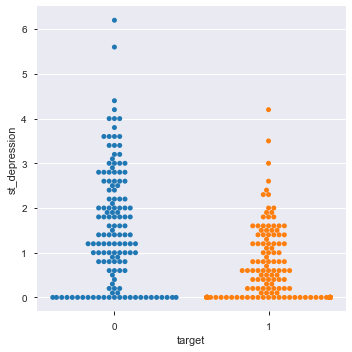

In [8]:
### Lets see the distribution of the continuous variables on the target
sns.catplot('target','age', kind='swarm', data=df)
sns.catplot('target','resting_blood_pressure', kind='swarm', data=df)
sns.catplot('target','serum_cholesterol',kind='swarm',data=df)
sns.catplot('target','max_heart_rate',kind='swarm', data=df)
sns.catplot('target','st_depression',kind='swarm', data=df)


In [9]:
from sklearn.model_selection import train_test_split
X = df.loc[:,['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate', 'exercise_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia']]
Y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

### Separate the numerical variables for scaling
num_columns =  ['age', 'resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate', 'st_depression',
               'chest_pain_type', 'rest_ecg', 'num_major_vessels', 'st_slope', 'thalassemia']
### Not scaling the categorical variables...as it doesn't make senabsse
X_train

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3


In [10]:
### StandardScaler()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[num_columns] = sc.fit_transform(X_train[num_columns])
X_test[num_columns] = sc.transform(X_test[num_columns])
X_train = pd.DataFrame(X_train)
X_train.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate', 'exercise_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia']
X_train

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia
64,0.328970,1,0.930945,0.509890,-0.734066,1,-0.993909,0.645806,0,-0.913190,0.966276,-0.736881,-0.548704
17,1.217518,0,1.882040,1.084003,-0.428709,0,0.913103,-1.647766,0,1.380439,-2.291454,-0.736881,-0.548704
220,0.884313,0,-0.971245,1.084003,3.255943,0,-0.993909,0.151114,0,2.615470,-0.662589,2.483563,1.177884
224,-0.115304,1,-0.971245,-1.212449,-0.164065,0,0.913103,-1.108102,1,1.556872,-0.662589,0.336600,1.177884
188,-0.559578,1,0.930945,0.509890,-0.286208,0,0.913103,0.555862,0,-0.383891,-0.662589,0.336600,1.177884
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.551107,1,-0.971245,0.796947,0.711294,0,-0.993909,-0.388550,1,1.556872,-0.662589,1.410082,1.177884
72,-2.892018,1,-0.020150,-0.064223,-0.876567,0,-0.993909,2.309769,0,-0.913190,0.966276,-0.736881,-0.548704
108,-0.559578,0,-0.020150,-0.638336,-0.062279,0,0.913103,0.510890,0,0.057191,0.966276,-0.736881,-0.548704
276,0.328970,1,-0.971245,0.854358,-0.591566,0,0.913103,-2.052514,0,0.851140,-0.662589,0.336600,1.177884


## Random Forests

In [11]:
# Limitation of Random forests- Doesn't work well for correlated features
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 10000))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
features = selected_feat.tolist()
print(features)

['age', 'chest_pain_type', 'serum_cholesterol', 'max_heart_rate', 'st_depression', 'num_major_vessels', 'thalassemia']


## Univariate Feature Selection ( Doesn't consider correlation)

### ANOVA

In [12]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# define feature selection
fs = SelectKBest(score_func=f_classif, k=1)
# apply feature selection
X_selected = fs.fit_transform(X_train, y_train)
S1 = pd.Series(X_train.columns.to_list())
S2 = pd.Series(fs.scores_)
ANOVA_imp = pd.concat([S1,S2], axis=1)
ANOVA_imp.columns = ['Feature','Importance']
ANOVA_imp.set_index('Feature', inplace=True)
ANOVA_imp.sort_values(by='Importance', ascending=False, inplace=True)
ANOVA_imp.index

Index(['num_major_vessels', 'chest_pain_type', 'st_depression',
       'max_heart_rate', 'exercise_angina', 'thalassemia', 'sex', 'st_slope',
       'age', 'rest_ecg', 'resting_blood_pressure', 'serum_cholesterol',
       'fasting_blood_sugar'],
      dtype='object', name='Feature')

### Chi Squared (requires X_train input to be +ve...so can't use standard scaling)

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# define feature selection
fs = SelectKBest(score_func=chi2, k='all')
# apply feature selection
X_selected = fs.fit_transform(X_train_2, y_train)
S1 = pd.Series(X_train_2.columns.to_list())
S2 = pd.Series(fs.scores_)
ANOVA_imp = pd.concat([S1,S2], axis=1)
ANOVA_imp.columns = ['Feature','Importance']
ANOVA_imp.set_index('Feature', inplace=True)
ANOVA_imp.sort_values(by='Importance', ascending=False, inplace=True)
ANOVA_imp.index

NameError: name 'X_train_2' is not defined

### Mutual Information

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# define feature selection
fs = SelectKBest(score_func=mutual_info_classif, k='all')
# apply feature selection
X_selected = fs.fit_transform(X_train,y_train)
S1 = pd.Series(X_train.columns.to_list())
S2 = pd.Series(fs.scores_)
ANOVA_imp = pd.concat([S1,S2], axis=1)
ANOVA_imp.columns = ['Feature','Importance']
ANOVA_imp.set_index('Feature', inplace=True)
ANOVA_imp.sort_values(by='Importance', ascending=False, inplace=True)
ANOVA_imp.index

We should never use feature selection before train_test_split(). If we do that, we are biased towards results that are from unknown data.

In [ ]:
# 'age', 'chest_pain_type', 'max_heart_rate', 'st_depression', 'num_major_vessels', 'thalassemia'  ------> Random Forest 
# 'num_major_vessels', 'st_depression', 'max_heart_rate','exercise_angina', 'chest_pain_type', 'thalassemia', 'st_slope'-----> ANOVA
# 'exercise_angina', 'num_major_vessels', 'chest_pain_type', 'st_depression', 'sex'----------------------> Chi squared test
# 'num_major_vessels', 'thalassemia', 'st_slope', 'chest_pain_type','st_depression', 'exercise_angina', 'serum_cholesterol'----> Mutual Information 

import plotly.express as px
px.scatter_3d(df, x='chest_pain_type', y='exercise_angina', z='num_major_vessels', color='target')

## Model Building

### Phase 1 - Base models

In [92]:
#Import model
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# ---------------------------------------->>>>>>>>>>>Create Random Forests with 1000 trees
random_forest = RandomForestClassifier(random_state=42)

# ---------------------------------------->>>>>>>>>>>Create a Logistic regression Classifier
logistic_regression = LogisticRegression()

# ---------------------------------------->>>>>>>>>>>Create a Naive Bayes Classifier
naive_bayes = GaussianNB()

#---------------------------------------->>>>>>>>>>>Create a Linear Discriminant Analysis Classifier
lda = LinearDiscriminantAnalysis()

#---------------------------------------->>>>>>>>>>>Create a DecisionTree Classifier
decision_trees = DecisionTreeClassifier()

#---------------------------------------->>>>>>>>>>>Create a KNeighbors Classifier
k_neighbors = KNeighborsClassifier()

# ---------------------------------------->>>>>>>>>>>Create a svm Classifier
support_vector_machines = svm.SVC(kernel='rbf', C=10.0, gamma=0.01) 

#Train the model using the training sets
random_forest.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
lda.fit(X_train, y_train)
decision_trees.fit(X_train, y_train)
k_neighbors.fit(X_train, y_train)
support_vector_machines.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_rf = random_forest.predict(X_test)
y_pred_lr = logistic_regression.predict(X_test)
y_pred_nb = naive_bayes.predict(X_test)
y_pred_lda = lda.predict(X_test)
y_pred_dt = decision_trees.predict(X_test)
y_pred_knn = k_neighbors.predict(X_test)
y_pred_svm = support_vector_machines.predict(X_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy of a single train_test run:",metrics.accuracy_score(y_test, y_pred_rf))
print("Accuracy of a single train_test run:",metrics.accuracy_score(y_test, y_pred_lr))
print("Accuracy of a single train_test run:",metrics.accuracy_score(y_test, y_pred_nb))
print("Accuracy of a single train_test run:",metrics.accuracy_score(y_test, y_pred_lda))
print("The variance ratio of lda components",lda.explained_variance_ratio_)
print("Accuracy of a single train_test run:",metrics.accuracy_score(y_test, y_pred_dt))
print("Accuracy of a single train_test run::",metrics.accuracy_score(y_test, y_pred_knn))
print("Accuracy of a single train_test run:",metrics.accuracy_score(y_test, y_pred_svm))

print('='*30) ## Separator
# Accuracy Prediction using cross_val_score (For training set only)
from sklearn.model_selection import cross_val_score

accuracies_rf = cross_val_score(estimator=RandomForestClassifier(max_depth=5), X=X_train, y=y_train, cv=5)
print('Mean Accuracy_rf : {0:.8f}'.format(accuracies_rf.mean()))
print('Standard Deviation : {0:.8f}'.format(accuracies_rf.std()))

accuracies_lr = cross_val_score(estimator=LogisticRegression(), X=X_train, y=y_train, cv=5)
print('Mean Accuracy_lr : {0:.8f}'.format(accuracies_lr.mean()))
print('Standard Deviation : {0:.8f}'.format(accuracies_lr.std()))

accuracies_nb = cross_val_score(estimator=GaussianNB(), X=X_train, y=y_train, cv=5)
print('Mean Accuracy_nb : {0:.8f}'.format(accuracies_nb.mean()))
print('Standard Deviation : {0:.8f}'.format(accuracies_nb.std()))

accuracies_lda = cross_val_score(estimator=LinearDiscriminantAnalysis(), X=X_train, y=y_train, cv=5)
print('Mean Accuracy_lda : {0:.8f}'.format(accuracies_lda.mean()))
print('Standard Deviation : {0:.8f}'.format(accuracies_lda.std()))

accuracies_dt = cross_val_score(estimator=DecisionTreeClassifier(), X=X_train, y=y_train, cv=5)
print('Mean Accuracy_dt : {0:.8f}'.format(accuracies_dt.mean()))
print('Standard Deviation : {0:.8f}'.format(accuracies_dt.std()))

accuracies_knn = cross_val_score(estimator=KNeighborsClassifier(), X=X_train, y=y_train, cv=5)
print('Mean Accuracy_lda : {0:.8f}'.format(accuracies_knn.mean()))
print('Standard Deviation : {0:.8f}'.format(accuracies_knn.std()))

accuracies_svm = cross_val_score(estimator=svm.SVC(kernel='rbf', C=10.0, gamma=0.01), X=X_train, y=y_train, cv=5)
print('Mean Accuracy_svm : {0:.8f}'.format(accuracies_svm.mean()))
print('Standard Deviation : {0:.8f}'.format(accuracies_svm.std()))

### Store all mean accuracies and std dev of base models (except lda and dt)
mean_acc = []
mean_std = []
mean_acc = [accuracies_rf.mean(), accuracies_lr.mean(), accuracies_nb.mean(), accuracies_knn.mean(),
               accuracies_svm.mean()]
mean_std = [accuracies_rf.std(), accuracies_lr.std(), accuracies_nb.std(), accuracies_knn.std(),
               accuracies_svm.std()]
print(mean_acc,mean_std)

### Store all mean accuracies and std dev of optimized models (except lda and dt)
optimized_mean_acc = []
optimized_mean_std = []

Accuracy of a single train_test run: 0.8
Accuracy of a single train_test run: 0.8666666666666667
Accuracy of a single train_test run: 0.9
Accuracy of a single train_test run: 0.8666666666666667
The variance ratio of lda components [1.]
Accuracy of a single train_test run: 0.7666666666666667
Accuracy of a single train_test run:: 0.8666666666666667
Accuracy of a single train_test run: 0.8833333333333333
Mean Accuracy_rf : 0.84728261
Standard Deviation : 0.03450885
Mean Accuracy_lr : 0.83949275
Standard Deviation : 0.05834177
Mean Accuracy_nb : 0.81340580
Standard Deviation : 0.06419539
Mean Accuracy_lda : 0.83931159
Standard Deviation : 0.05289297
Mean Accuracy_dt : 0.71195652
Standard Deviation : 0.07160726
Mean Accuracy_lda : 0.80072464
Standard Deviation : 0.05100531
Mean Accuracy_svm : 0.84800725
Standard Deviation : 0.04404969
[0.8472826086956522, 0.8394927536231884, 0.8134057971014494, 0.8007246376811594, 0.8480072463768117] [0.034508848698867355, 0.05834177182640729, 0.06419539410

Our aim is to now increase the cross validation score to get the model with highest accuracy

### Phase 2- Plotting Learning curve of the Base Models

#### Optimization Learning Curve

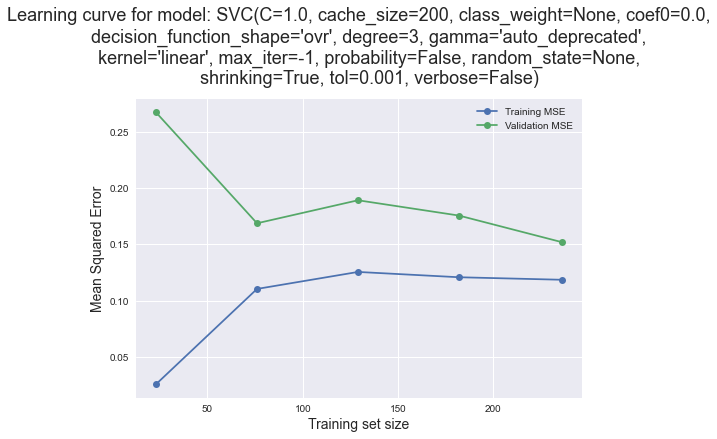

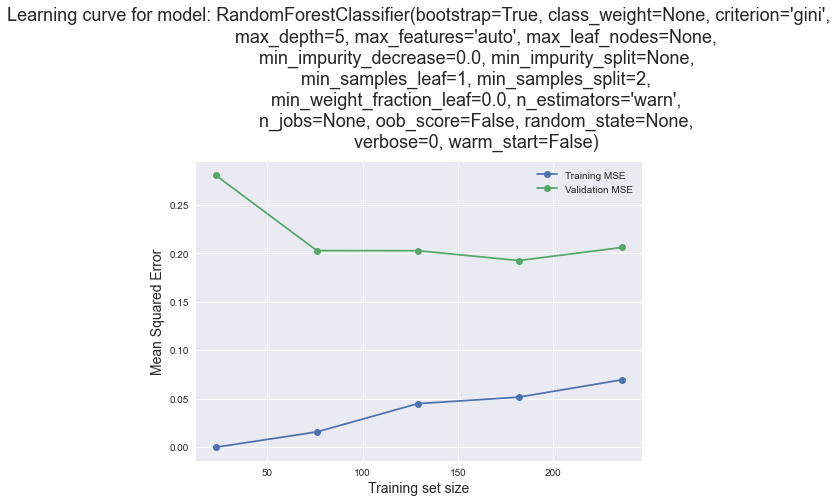

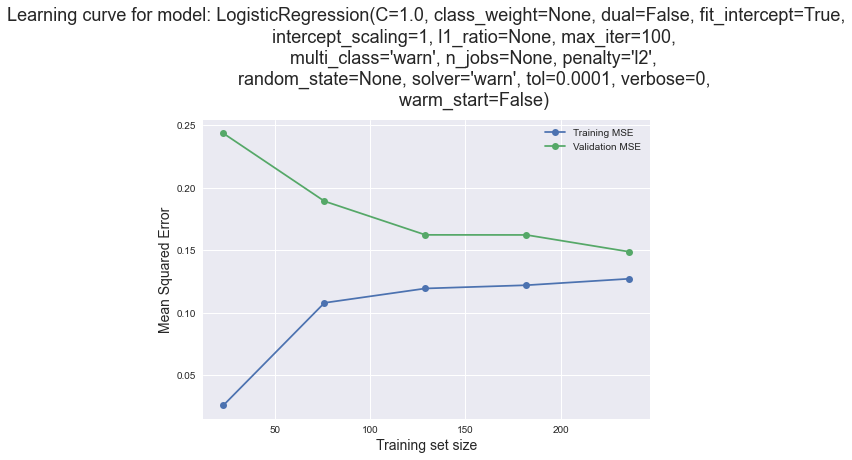

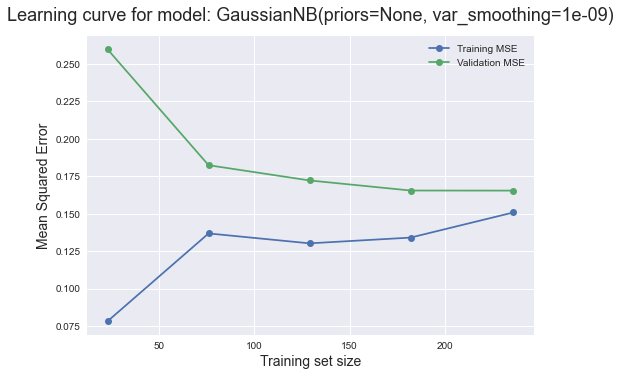

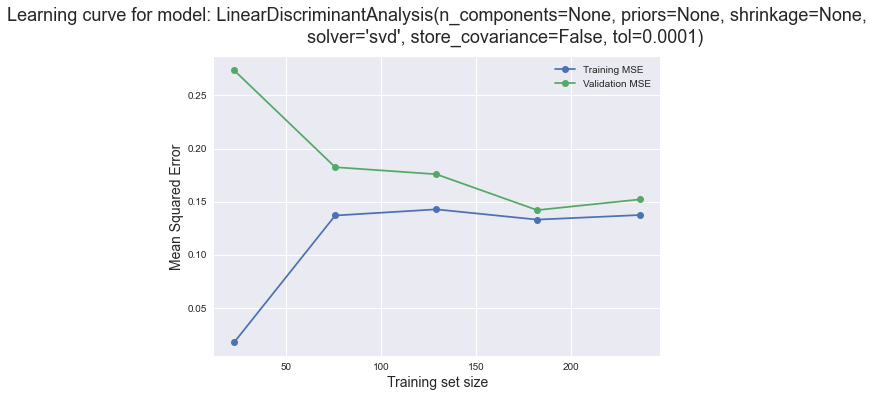

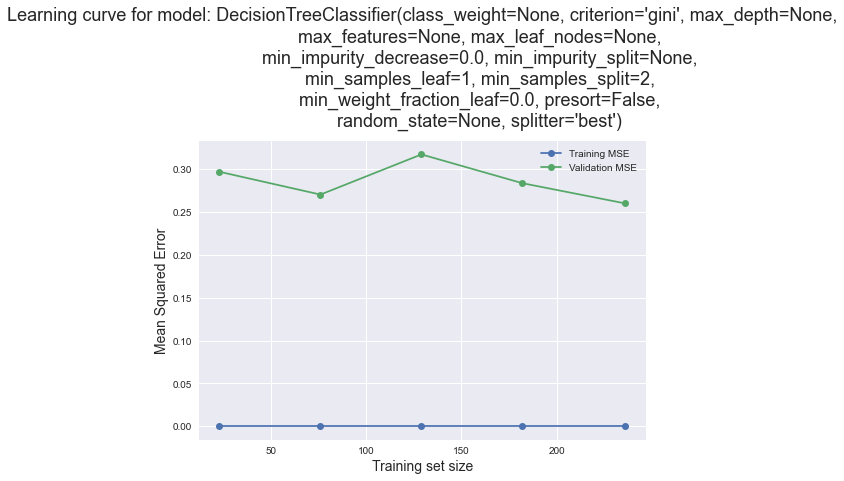

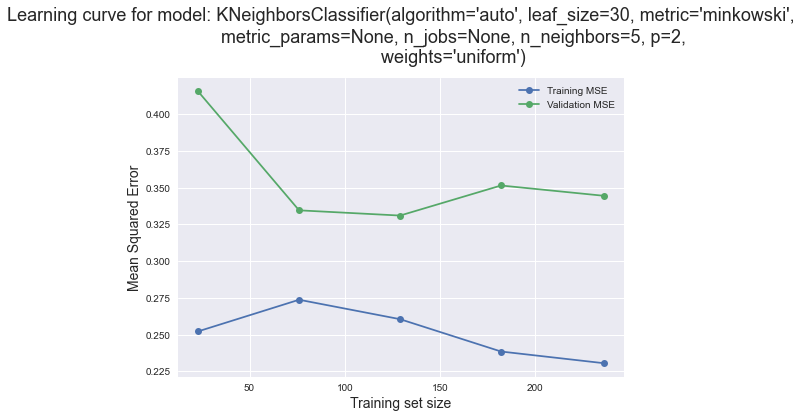

<Figure size 576x396 with 0 Axes>

In [25]:
from sklearn.model_selection import learning_curve, StratifiedKFold
import sklearn
### Scaling
cv = StratifiedKFold(n_splits=5)

def plot_learning_curve(estimator_provided):
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator_provided, X = X, y = Y,
                                                                  cv=cv,
                                                                  shuffle=True,
                                                                  scoring = 'neg_mean_squared_error') 
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    """print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    print('\n', '-' * 20) # separator
    print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))"""

    import matplotlib.pyplot as plt
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean,'o-', label = 'Training MSE')
    plt.plot(train_sizes, validation_scores_mean, 'o-', label = 'Validation MSE', )
    plt.ylabel('Mean Squared Error', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curve for model: '+str(estimator_provided), fontsize = 18, y = 1.03)
    plt.legend()
    plt.figure()

plot_learning_curve(svm.SVC(kernel='linear'))
plot_learning_curve(RandomForestClassifier(max_depth=5))
plot_learning_curve(LogisticRegression())
plot_learning_curve(GaussianNB())
plot_learning_curve(LinearDiscriminantAnalysis())
plot_learning_curve(DecisionTreeClassifier())
plot_learning_curve(KNeighborsClassifier())

#### Perfomance Learning Curve

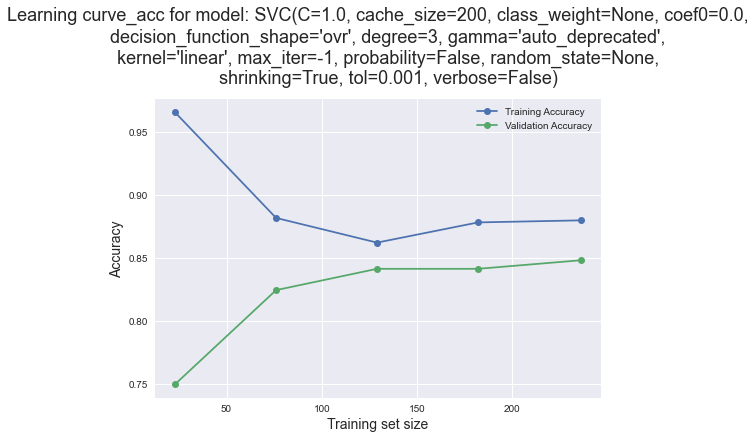

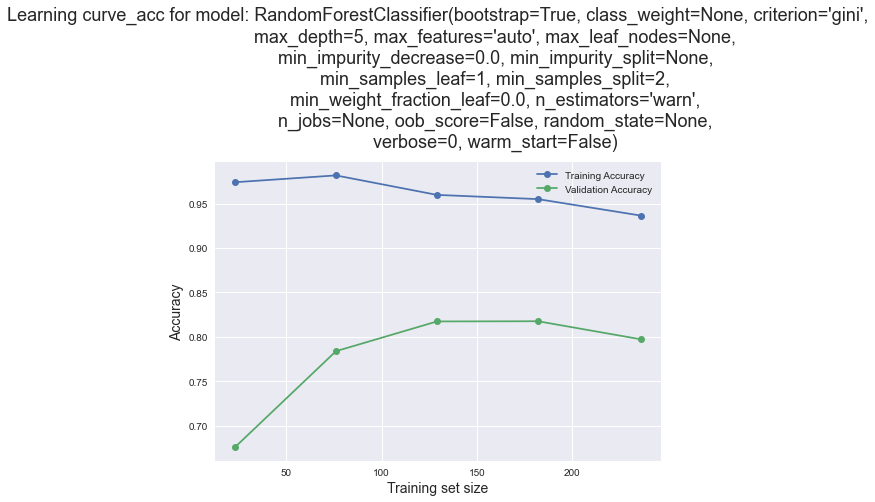

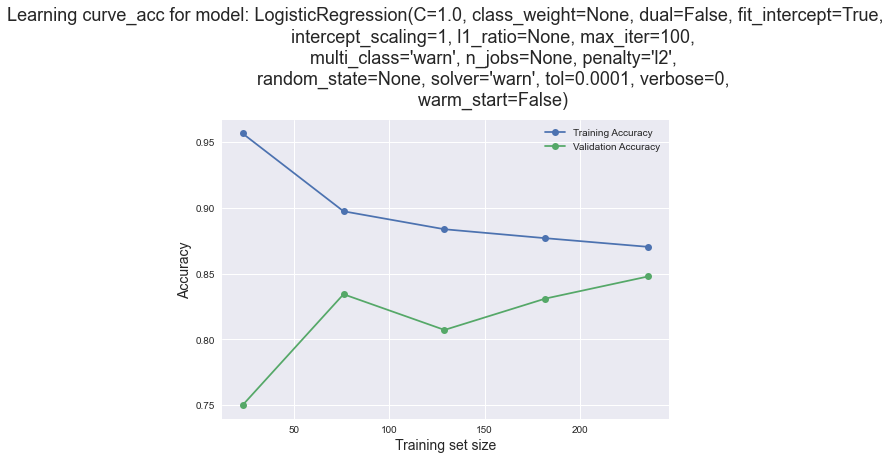

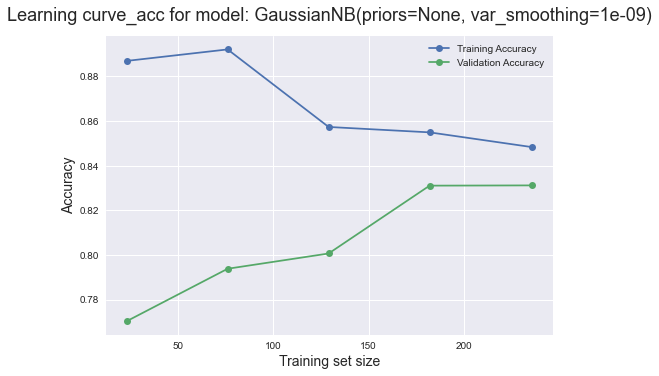

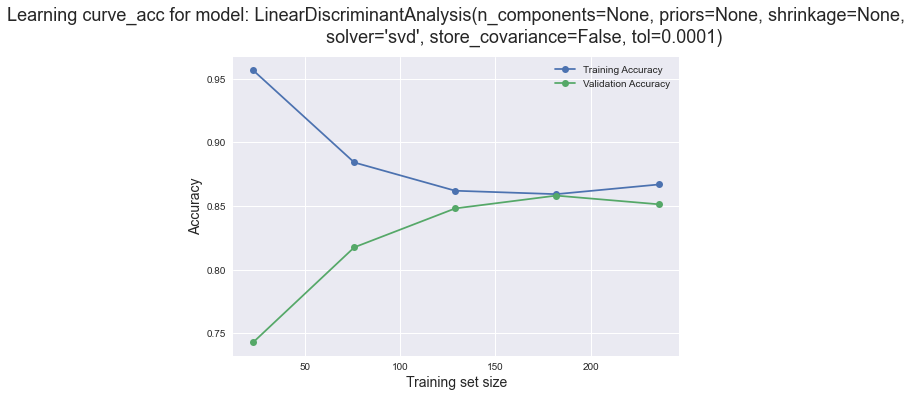

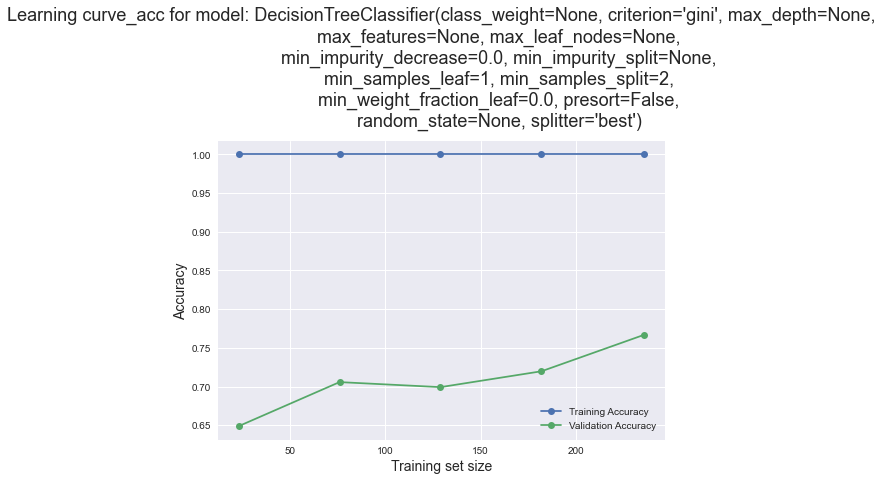

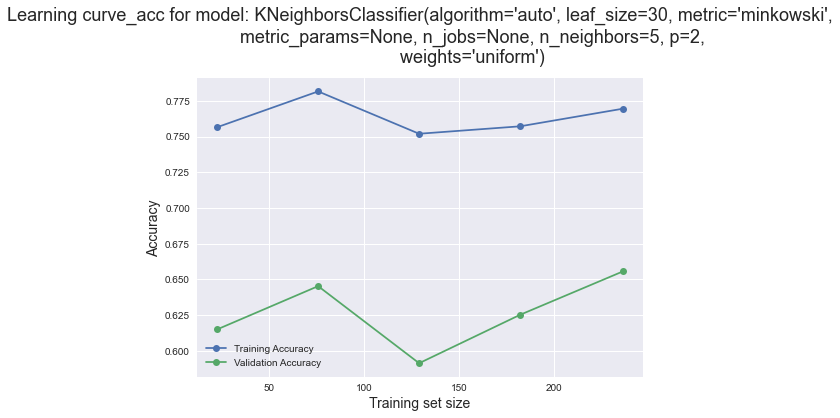

<Figure size 576x396 with 0 Axes>

In [27]:
from sklearn.model_selection import learning_curve, StratifiedKFold
import sklearn
### Scaling
cv = StratifiedKFold(n_splits=5)

def plot_learning_curve_acc(estimator_provided):
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator_provided, X = X, y = Y,
                                                                  cv=cv,
                                                                  shuffle=True,
                                                                  scoring = 'accuracy') 
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    """print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    print('\n', '-' * 20) # separator
    print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))"""

    import matplotlib.pyplot as plt
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean,'o-', label = 'Training Accuracy')
    plt.plot(train_sizes, validation_scores_mean, 'o-', label = 'Validation Accuracy', )
    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curve_acc for model: '+str(estimator_provided), fontsize = 18, y = 1.03)
    plt.legend()
    plt.figure()

plot_learning_curve_acc(svm.SVC(kernel='linear'))
plot_learning_curve_acc(RandomForestClassifier(max_depth=5))
plot_learning_curve_acc(LogisticRegression())
plot_learning_curve_acc(GaussianNB())
plot_learning_curve_acc(LinearDiscriminantAnalysis())
plot_learning_curve_acc(DecisionTreeClassifier())
plot_learning_curve_acc(KNeighborsClassifier())

### Phase 3- Hyperparameter Optimization

#### SVM

The best parameters are {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'} with a score of 0.85. (Done in GPU)

In [95]:
svm_optimized = svm.SVC(kernel='rbf', C=10.0, gamma=0.01) 
svm_optimized.fit(X_train, y_train)
y_pred_svm_optimized = svm_optimized.predict(X_test)

print("Accuracy of a single train_test run::",metrics.accuracy_score(y_test, y_pred_svm_optimized))
optimized_accuracies_svm = cross_val_score(estimator=svm_optimized, X=X_train, y=y_train, cv=5)
print('Mean Accuracy_svm : {0:.8f}'.format(optimized_accuracies_svm.mean()))
print('Standard Deviation : {0:.8f}'.format(optimized_accuracies_svm.std()))

Accuracy of a single train_test run:: 0.8833333333333333
Mean Accuracy_svm : 0.84800725
Standard Deviation : 0.04404969


#### Random Forests

The best parameters are {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200} with a score of 0.86. (Done in GPU)

In [96]:
rf_optimized = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2,
                                     min_samples_split=10, n_estimators=200)
rf_optimized.fit(X_train,y_train)
y_pred_rf_optimized = rf_optimized.predict(X_test)

print("Accuracy of a single train_test run::",metrics.accuracy_score(y_test, y_pred_rf_optimized))
optimized_accuracies_rf = cross_val_score(estimator=rf_optimized, X=X_train, y=y_train, cv=5)
print('Mean Accuracy_rf : {0:.8f}'.format(optimized_accuracies_rf.mean()))
print('Standard Deviation : {0:.8f}'.format(optimized_accuracies_rf.std()))

Accuracy of a single train_test run:: 0.85
Mean Accuracy_rf : 0.84329710
Standard Deviation : 0.05718156


#### PCA followed by Logistic Regression

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = PCA()

# Create a pipeline of two steps. 
# First, tranform the data with PCA.
# Second, train a logistic regression on the data.
pipe = Pipeline(steps=[('pca', pca),
                       ('logistic', logistic_regression)])

from sklearn.model_selection import GridSearchCV
# Create a list of a sequence of integers from 1 to 14(the number of features)
n_components = list(range(1,X_train.shape[1]+1,1)) # Using pca
penalty = ['l1', 'l2']
# Create range of candidate regularization hyperparameter values C
# Choose 50 values, between -4 and 4
C = np.logspace(-4, 4, 50)
# Create a parameter grid 
param_grid = dict(logistic__penalty=penalty,
                  logistic__C=C, 
                  pca__n_components=n_components)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

grid.fit(X_train,y_train)
print("The best parameters are %s with a score of %0.2f"
  % (grid.best_params_, grid.best_score_))

The best parameters are {'logistic__C': 0.08685113737513521, 'logistic__penalty': 'l2', 'pca__n_components': 12} with a score of 0.86


In [107]:
pca = PCA(n_components=12)
pipe_optimized = Pipeline(steps=[('pca', pca),
                       ('logistic', LogisticRegression(penalty='l2', C=0.08685113737513521))])
pipe_optimized.fit(X_train, y_train)
y_pred_lr_optimized  = pipe_optimized.predict(X_test)

print("Accuracy of a single train_test run::",metrics.accuracy_score(y_test, y_pred_lr_optimized))
optimized_accuracies_lr = cross_val_score(estimator=pipe_optimized, X=X_train, y=y_train, cv=5)
print('Mean Accuracy_lr : {0:.8f}'.format(optimized_accuracies_lr.mean()))
print('Standard Deviation : {0:.8f}'.format(optimized_accuracies_lr.std()))

Accuracy of a single train_test run:: 0.9
Mean Accuracy_lr : 0.85615942
Standard Deviation : 0.05866433


#### Naive Bayes

In [46]:
var_smoothing = np.logspace(0,-9, num=100)
param_grid = dict(var_smoothing=var_smoothing)
grid = GridSearchCV(GaussianNB(), param_grid=param_grid, cv=5)

grid.fit(X_train,y_train)
print("The best parameters are %s with a score of %0.2f"
  % (grid.best_params_, grid.best_score_))


The best parameters are {'var_smoothing': 0.23101297000831597} with a score of 0.84


In [98]:
nb_optimized = GaussianNB(var_smoothing=0.23101297000831597)
nb_optimized.fit(X_train,y_train)
y_pred_nb_optimized = nb_optimized.predict(X_test)
print("Accuracy of a single train_test run::",metrics.accuracy_score(y_test, y_pred_nb_optimized))
optimized_accuracies_nb = cross_val_score(estimator=nb_optimized, X=X_train, y=y_train, cv=5)
print('Mean Accuracy_nb : {0:.8f}'.format(optimized_accuracies_nb.mean()))
print('Standard Deviation : {0:.8f}'.format(optimized_accuracies_nb.std()))

Accuracy of a single train_test run:: 0.8666666666666667
Mean Accuracy_nb : 0.83913043
Standard Deviation : 0.03814083


#### LDA (no hyperparameters)

#### K nearest Neighbours

In [48]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
param_grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
grid.fit(X_train,y_train)

print("The best parameters are %s with a score of %0.2f"
  % (grid.best_params_, grid.best_score_))

The best parameters are {'leaf_size': 1, 'n_neighbors': 10, 'p': 1} with a score of 0.84


In [99]:
knn_optimized = KNeighborsClassifier(leaf_size=1, n_neighbors=10, p=1)
knn_optimized.fit(X_train,y_train)
y_pred_knn_optimized = knn_optimized.predict(X_test)

print("Accuracy of a single train_test run::",metrics.accuracy_score(y_test, y_pred_knn_optimized))
optimized_accuracies_knn = cross_val_score(estimator=knn_optimized, X=X_train, y=y_train, cv=5)
print('Mean Accuracy_knn : {0:.8f}'.format(optimized_accuracies_knn.mean()))
print('Standard Deviation : {0:.8f}'.format(optimized_accuracies_knn.std()))

Accuracy of a single train_test run:: 0.8666666666666667
Mean Accuracy_knn : 0.83894928
Standard Deviation : 0.04874636


### Comparing acuracies of base and optimized models

In [101]:
optimized_mean_acc = [optimized_accuracies_rf.mean(), optimized_accuracies_lr.mean(), optimized_accuracies_nb.mean(), optimized_accuracies_knn.mean(),
               optimized_accuracies_svm.mean()]
optimized_mean_std = [optimized_accuracies_rf.std(), optimized_accuracies_lr.std(), optimized_accuracies_nb.std(), optimized_accuracies_knn.std(),
               optimized_accuracies_svm.std()]

Accuracy_comparision = pd.DataFrame(np.column_stack([mean_acc, mean_std, optimized_mean_acc, optimized_mean_std]), 
                                    columns=['Base Model Accuracy', 'Base Model Std dev.', 'Optimized Model Accuracy', 'Optimized Model Std dev.'],
                                    index=['Random Forests', 'Logistic Regression', 'Naive Bayes', 'K Nearest Neighbours', 'Support Vector Machines'] 
                                   )
Accuracy_comparision

,Base Model Accuracy,Base Model Std dev.,Optimized Model Accuracy,Optimized Model Std dev.
Random Forests,0.847283,0.034509,0.843297,0.057182
Logistic Regression,0.839493,0.058342,0.856159,0.058664
Naive Bayes,0.813406,0.064195,0.839130,0.038141
K Nearest Neighbours,0.800725,0.051005,0.838949,0.048746
Support Vector Machines,0.848007,0.044050,0.848007,0.044050


## Phase 4- Creating Ensemble models

It is always good to use esemble models beacuse they are very effective. Here, I will be using Voting Classifier which does exaclty what it sounds like. It takes mulitple models and combine them together and do voting on the prediction and picks the best for us. So lets take the ensemble models (using optimized parameters) for **pca followed by logistic regression, random forest classifier, naive bayes, knn and svm**.

#### Max Voting

In [60]:
ensembles = [pipe_optimized, rf_optimized, nb_optimized, knn_optimized, svm_optimized ]
for estimator in ensembles:
    #print("Training the", estimator)
    estimator.fit(X_train,y_train)

In [57]:
scores = [estimator.score(X_test, y_test) for estimator in ensembles]
scores

[0.9, 0.85, 0.8666666666666667, 0.8666666666666667, 0.8833333333333333]

In [102]:
# Lets define our estimators in a list

named_estimators = [
    ("log_reg",pipe_optimized),
    ('random_forest', rf_optimized),
    ('svm',svm_optimized),
    ('knn', knn_optimized),
    ('naive_bayes', nb_optimized)]
from sklearn.ensemble import VotingClassifier
# Creating an instance for our Voting classifier
voting_clf = VotingClassifier(named_estimators, voting ='hard')

voting_clf.fit(X_train,y_train)
acc = voting_clf.score(X_test,y_test)
print(f"The accuracy on test set using voting classifier is {np.round(acc, 3)*100}%")

accuracies_voting = cross_val_score(estimator=voting_clf, X=X_train, y=y_train, cv=5)
print('Mean Accuracy_voting : {0:.8f}'.format(accuracies_voting.mean()))
print('Standard Deviation : {0:.8f}'.format(accuracies_voting.std()))

The accuracy on test set using voting classifier is 88.3%
Mean Accuracy_voting : 0.84347826
Standard Deviation : 0.05141673


#### Boosting

##### AdaBoost Classifier

In [123]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=2, n_estimators = 40)
accuracies_adaboost = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print('Mean Accuracy_adaboost : {0:.8f}'.format(accuracies_adaboost.mean()))
print('Standard Deviation : {0:.8f}'.format(accuracies_adaboost.std()))

Mean Accuracy_adaboost : 0.78822464
Standard Deviation : 0.06689764


##### Stochastic Gradient Boosting

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, random_state=2)
results = cross_val_score(model, X_train, y_train, cv=5)
print(results.mean())

0.8010869565217391


##### XGBoost

In [147]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=2,learning_rate=0.01)
results = cross_val_score(model, X_train, y_train, cv=5)
print(results.mean())

0.8436594202898551


## Deployment

For the sake of robustness, lets use max voting as our final model.